# Import Libraries

In [1]:
import numpy as np
import pandas as pd 
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.applications.resnet50 import preprocess_input
import torch as th
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as img
from matplotlib.image import imread
import random
import os
import tensorflow as tf

# 1. Dogs vs. Cats Dataset Preparation

## 1.1 Identify the Dataset's Specifics

### There are total number of 25,000 JPG images in the dataset.
### The photographs are labelled with the terms "dog" or "cat" in the filename. 
### Both dogs and cats have the equivalent amount of photos (12,500)

25000 total data
       filename  category
0     cat.0.jpg         0
1     cat.1.jpg         0
2    cat.10.jpg         0
3   cat.100.jpg         0
4  cat.1000.jpg         0


Text(0.5, 1.0, 'Data Distribution')

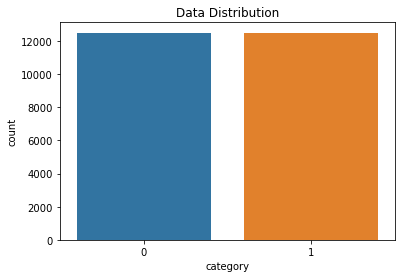

In [2]:
filenames = os.listdir("./Datasets")
print(len(filenames), "total data")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
print(df.head())
sns.countplot(x='category',data=df).set_title("Data Distribution")

### The photos are color and of various shapes and sizes.

<class 'PIL.JpegImagePlugin.JpegImageFile'>


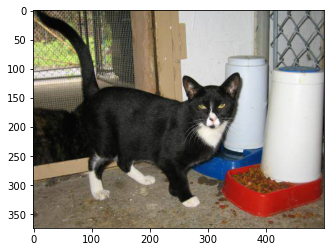

In [3]:
# Plot a sample figure
sample = random.choice(filenames)
image = load_img("./Datasets/"+sample)
plt.imshow(image)
print(type(image))

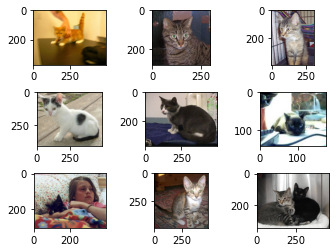

In [4]:
# plot cat photos from the dogs vs cats dataset
# define location of dataset
folder = 'Datasets/'
# plot first few images
for i in range(9):
 # define subplot
    plt.subplot(330 + 1 + i)
 # define filename
    filename = folder + 'cat.' + str(i) + '.jpg'
 # load image pixels
    image = imread(filename)
 # plot raw pixel data
    plt.imshow(image)
    plt.subplots_adjust(wspace =0, hspace =0.5)
# show the figure
plt.show()

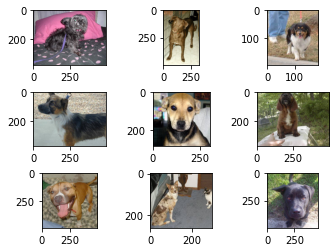

In [5]:
# plot dog photos from the dogs vs cats dataset
# define location of dataset
folder = 'Datasets/'
# plot first few images
for i in range(9):
 # define subplot
    plt.subplot(330 + 1 + i)
 # define filename
    filename = folder + 'dog.' + str(i) + '.jpg'
 # load image pixels
    image = imread(filename)
 # plot raw pixel data
    plt.imshow(image)
    plt.subplots_adjust(wspace =0, hspace =0.5)
# show the figure
plt.show()

### The color images are in RBG format.

In [6]:
images = []
for i in range(10):  
    im = img.imread('Datasets/cat.{}.jpg'.format(i))
    images.append(im)
    print('image shape', im.shape, 'maximum color level', im.max())

image shape (374, 500, 3) maximum color level 255
image shape (280, 300, 3) maximum color level 255
image shape (396, 312, 3) maximum color level 255
image shape (414, 500, 3) maximum color level 255
image shape (375, 499, 3) maximum color level 255
image shape (144, 175, 3) maximum color level 255
image shape (303, 400, 3) maximum color level 255
image shape (499, 495, 3) maximum color level 255
image shape (345, 461, 3) maximum color level 255
image shape (425, 320, 3) maximum color level 247


## 1.2 Add categorical labels for the dataset & Split the dataset

### 1 for dogs and 0 for cats. 
### training, testing and validation with 3:1:1 proportion.

In [7]:
df["category"] = df["category"].replace({0: '0', 1: '1'}) 
train_df, temp_df = train_test_split(df, test_size=0.4)
valid_df, test_df = train_test_split(temp_df, test_size=0.5)
print(train_df.shape)
print(valid_df.shape)
print(test_df.shape)

(15000, 2)
(5000, 2)
(5000, 2)


# 2. Mini Batches Generating for Training

### Mini-batch gradient descent and data augmentation
### ImageDataGenerator is a class that provides a variety of ways I can futher augment the data. Data augmentation is only added to the training data.
### flow_from_dataframe() method will accept dataframe with filenames as x_column and labels as y_column to generate mini-batches

In [8]:
#instantiate the constants
batch_size = 16
img_size = 224
epochs = 5

In [9]:
def generate_train_batch(model):
    
    if model == 'resnet':      #use of resnet requires its specific preprocessing_function for better accuracy for augmentation
        print('resnet data')
        train_datagen = ImageDataGenerator(
                    rotation_range=10,
                    zoom_range=0.1,
                    horizontal_flip=True,
                    fill_mode='nearest',
                    width_shift_range=0.1,
                    height_shift_range=0.1,
                    preprocessing_function = preprocess_input)

    else:
        train_datagen = ImageDataGenerator(    #standard augmentation
                    rotation_range=10,
                    rescale=1./255,
                    zoom_range=0.1,
                    horizontal_flip=True,
                    fill_mode='nearest',
                    width_shift_range=0.1,
                    height_shift_range=0.1)

    
    train_gen = train_datagen.flow_from_dataframe(
                    train_df,
                    "./Datasets/",
                    x_col='filename',
                    y_col='category',
                    target_size=(img_size, img_size),
                    batch_size = batch_size,
                    class_mode='binary')

    return train_gen


def generate_valid_batch(model):
    if model == 'resnet':
        print('resnet validation set')
        valid_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
    else:
        valid_datagen = ImageDataGenerator(rescale=1./255)
        
    valid_gen = valid_datagen.flow_from_dataframe(
            valid_df,
            "./Datasets/",
            x_col='filename',
            y_col='category',
            target_size=(img_size, img_size),
            batch_size = batch_size,
            class_mode='binary')
    
    return valid_gen

def generate_test_batch(model):
    if model == 'resnet':
        print('resnet test set')
        test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
    else:
        test_datagen = ImageDataGenerator(rescale=1./255)
        
    test_gen = test_datagen.flow_from_dataframe(
            test_df,
            "./Datasets/",
            x_col='filename',
            y_col='category',
            target_size=(img_size, img_size),
            batch_size = batch_size,
            class_mode='binary')
    
    return test_gen

train_gen = generate_train_batch('')
valid_gen = generate_valid_batch('')
test_gen =  generate_test_batch('')

Found 15000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


Found 1 validated image filenames belonging to 1 classes.


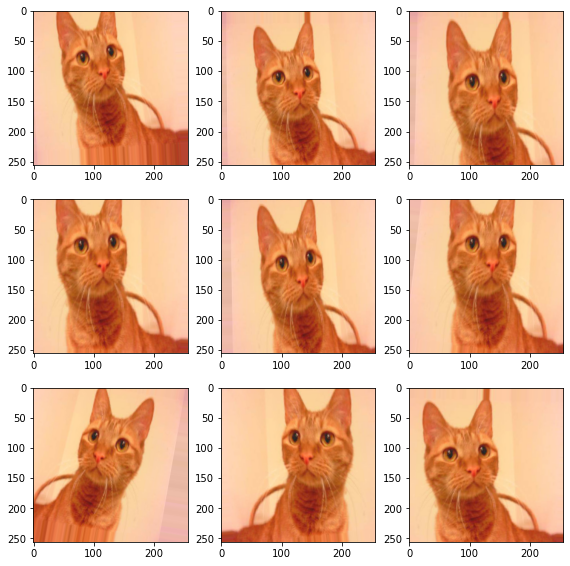

In [10]:
# visualize the effect of a random image after data augmentation

visual_datagen = ImageDataGenerator(    #standard augmentation
                    rotation_range=10,
                    rescale=1./255,
                    zoom_range=0.1,
                    horizontal_flip=True,
                    fill_mode='nearest',
                    width_shift_range=0.1,
                    height_shift_range=0.1)

visualise_df = train_df.sample(n=1).reset_index(drop=True)
visualisation_generator = visual_datagen.flow_from_dataframe(
    visualise_df,  
    "./Datasets/",
    x_col='filename',
    y_col='category'
)
plt.figure(figsize=(8, 8))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    for X_batch, Y_batch in visualisation_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

# Simple three layer CNN model

In [11]:
from keras.applications import resnet
from keras.layers import *
from keras.models import Model,Sequential
from keras import optimizers
from keras import regularizers

from keras import backend as K
K.clear_session()

In [12]:
#model instantiation
modelcnn=Sequential()
modelcnn.add(Conv2D(16, (3,3), activation="relu", input_shape=(img_size, img_size, 3)))
modelcnn.add(Conv2D(16, (3,3), activation="relu",))
modelcnn.add(MaxPooling2D((3,3)))

modelcnn.add(Conv2D(32, (3,3), activation="relu"))
modelcnn.add(Conv2D(32, (3,3), activation="relu"))
modelcnn.add(MaxPooling2D(2,2))

modelcnn.add(Conv2D(64, (3,3), activation="relu"))
modelcnn.add(Conv2D(64, (3,3), activation="relu"))
modelcnn.add(MaxPooling2D(2,2))
modelcnn.add(Dropout(0.3))

modelcnn.add(Conv2D(32, (3,3), activation="relu"))
modelcnn.add(MaxPooling2D((2,2)))

modelcnn.add(Flatten())
modelcnn.add(Dense(512, activation="relu"))
modelcnn.add(Dropout(0.5))
modelcnn.add(Dense(1, activation="sigmoid"))

modelcnn.compile(loss="binary_crossentropy", 
         optimizer=optimizers.RMSprop(lr=1e-4),
         metrics=["accuracy"])

In [13]:
modelcnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 69, 69, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        1

In [12]:
modelcnn.fit_generator(train_gen,
                    epochs=epochs,
                    validation_data=valid_gen)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
938/938 [==============================] - 641s 683ms/step - loss: 0.6741 - accuracy: 0.5653 - val_loss: 0.6332 - val_accuracy: 0.6418
Epoch 2/5
938/938 [==============================] - 630s 672ms/step - loss: 0.6343 - accuracy: 0.6329 - val_loss: 0.6096 - val_accuracy: 0.6606
Epoch 3/5
938/938 [==============================] - 607s 647ms/step - loss: 0.5847 - accuracy: 0.6880 - val_loss: 0.5278 - val_accuracy: 0.7446
Epoch 4/5
938/938 [==============================] - 605s 645ms/step - loss: 0.5530 - accuracy: 0.7157 - val_loss: 0.5893 - val_accuracy: 0.6954
Epoch 5/5
938/938 [==============================] - 599s 639ms/step - loss: 0.5267 - accuracy: 0.7368 - val_loss: 0.4818 - val_accuracy: 0.7676


In [13]:
modelcnn.save_weights('cnn-net.model') 

In [14]:
loss, accuracy = modelcnn.evaluate_generator(valid_gen, valid_gen.samples//batch_size, workers=12)
print("Validation: accuracy = %f  ;  loss = %f " % (accuracy, loss))

Instructions for updating:
Please use Model.evaluate, which supports generators.
Validation: accuracy = 0.767228  ;  loss = 0.482097 


In [38]:
loss, accuracy = modelcnn.evaluate_generator(test_gen, test_gen.samples//batch_size, workers=12)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

Validation: accuracy = 0.767829  ;  loss = 0.481755 


# Fine tuning model

In [12]:

res = resnet.ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

res_train_gen = generate_train_batch('resnet')
res_valid_gen = generate_valid_batch('resnet')


for layer in res.layers[:171]:
    layer.trainable=False
    

flat = Flatten()(res.output)   #Flatten the output layer from our Resnet model
dense = Dense(1024,activation='relu')(flat)
drop = Dropout(0.5)(dense)
classifier = Dense(1, activation='sigmoid')(drop)


res_model = Model(res.input, classifier)
optimizer=optimizers.Adam(1e-5)


res_model.compile(optimizer= optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_mymodel = res_model.fit_generator(res_train_gen,
                    epochs=epochs,
                    validation_data=res_valid_gen,
                    validation_steps=res_train_gen.samples//batch_size,
                    steps_per_epoch = res_valid_gen.samples//batch_size
                    )

resnet data
Found 15000 validated image filenames belonging to 2 classes.
resnet validation set
Found 5000 validated image filenames belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
312/312 [==============================] - 830s 3s/step - loss: 0.1605 - accuracy: 0.9553 - val_loss: 0.0793 - val_accuracy: 0.9794
Epoch 2/5
312/312 [==============================] - 494s 2s/step - loss: 0.0959 - accuracy: 0.9766
Epoch 3/5
312/312 [==============================] - 484s 2s/step - loss: 0.0714 - accuracy: 0.9820
Epoch 4/5
312/312 [==============================] - 487s 2s/step - loss: 0.0949 - accuracy: 0.9771
Epoch 5/5
312/312 [==============================] - 488s 2s/step - loss: 0.0517 - accuracy: 0.9858


In [18]:
res_model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [13]:
 res_model.save('my_model.h5') 
# model = load_model('my_model.h5')

In [15]:
loss, accuracy = res_model.evaluate_generator(res_valid_gen, res_valid_gen.samples//batch_size, workers=12)
print("Validation: accuracy = %f  ;  loss = %f " % (accuracy, loss))

Validation: accuracy = 0.975160  ;  loss = 0.114434 


In [16]:
res_test_gen = generate_test_batch('resnet')
loss, accuracy = res_model.evaluate_generator(res_test_gen, res_test_gen.samples//batch_size, workers=12)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

resnet test set
Found 5000 validated image filenames belonging to 2 classes.
Test: accuracy = 0.977364  ;  loss = 0.107553 


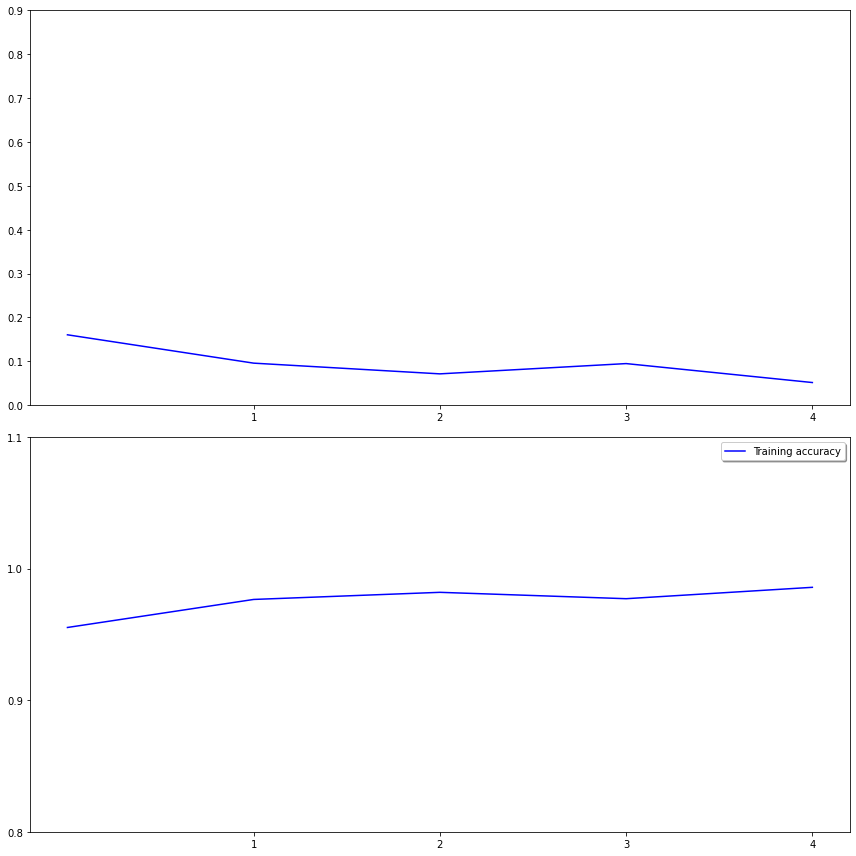

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history_mymodel.history['loss'], color='b', label="Training loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
ax2.plot(history_mymodel.history['accuracy'], color='b', label="Training accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))
ax2.set_yticks(np.arange(0.8, 1.1, 0.1))
legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# Display of results

In [32]:
test_sample = test_df.sample(n=12)

def test_img(model,name):
    result_lst = []
    for path in test_sample['filename'].to_numpy():
        full_path = './Datasets/'+path
        x = load_img(full_path, target_size=(224,224))
        img_array = img_to_array(x)
        img_array = np.expand_dims(img_array, axis=0)
        
        result =  model.predict(img_array)
        
        result = 'dog' if float(result) >0.5 else 'cat'
        
        result_lst.append(result)
    return result_lst

In [33]:
finetune_result = test_img(res_model,'resnet')

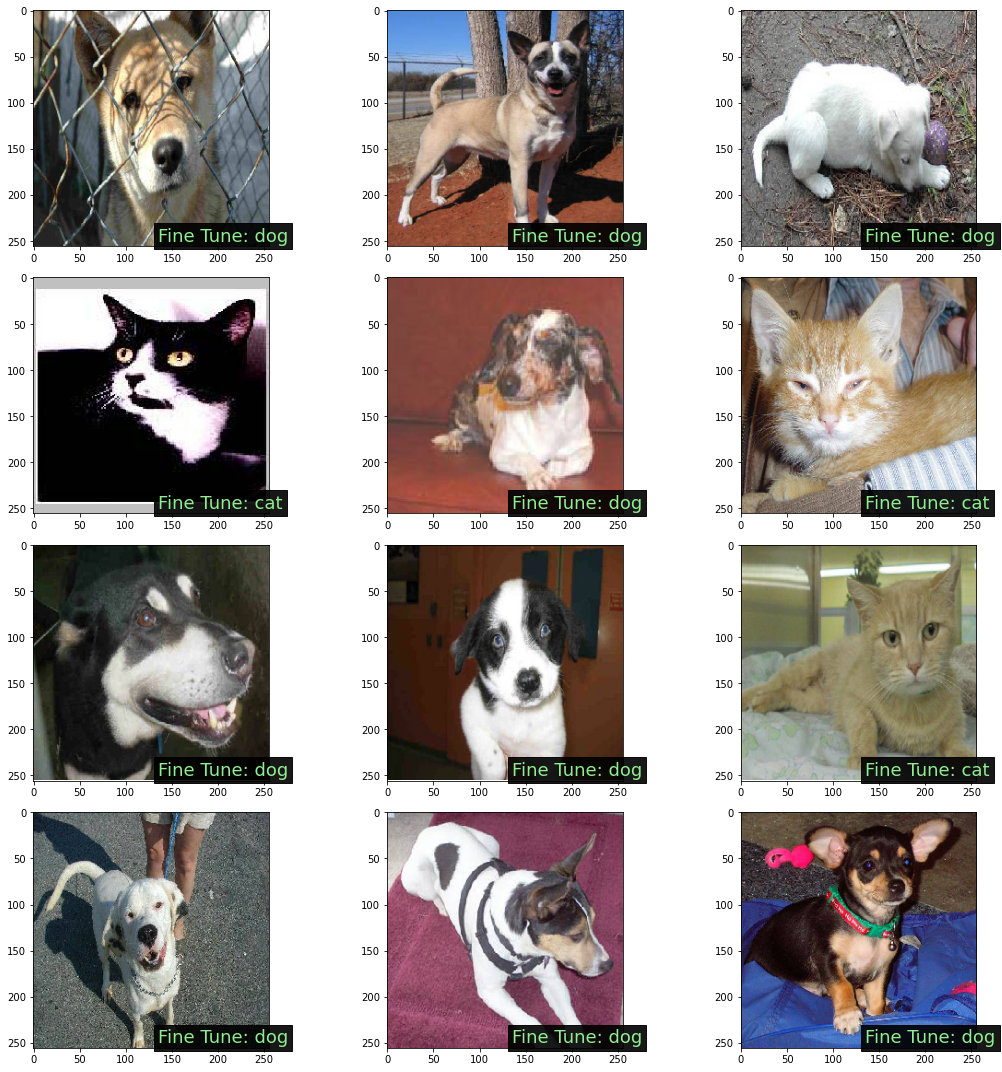

In [36]:
# plotting images with prediction
pred_results  = list(finetune_result)
test_array = test_sample['filename'].to_numpy()

plt.figure(figsize=(15, 15))
for i in range(0, 12):
    plt.subplot(4, 3, i+1)
    ft = pred_results[i]
    img = test_array[i]
    path = './Datasets/' + img
    image = load_img(path, target_size=(256,256))
    plt.text(135, 250, 'Fine Tune: {}'.format(ft), color='lightgreen',fontsize= 18, bbox=dict(facecolor='black', alpha=0.9))
    plt.imshow(image)

plt.tight_layout()
plt.show()

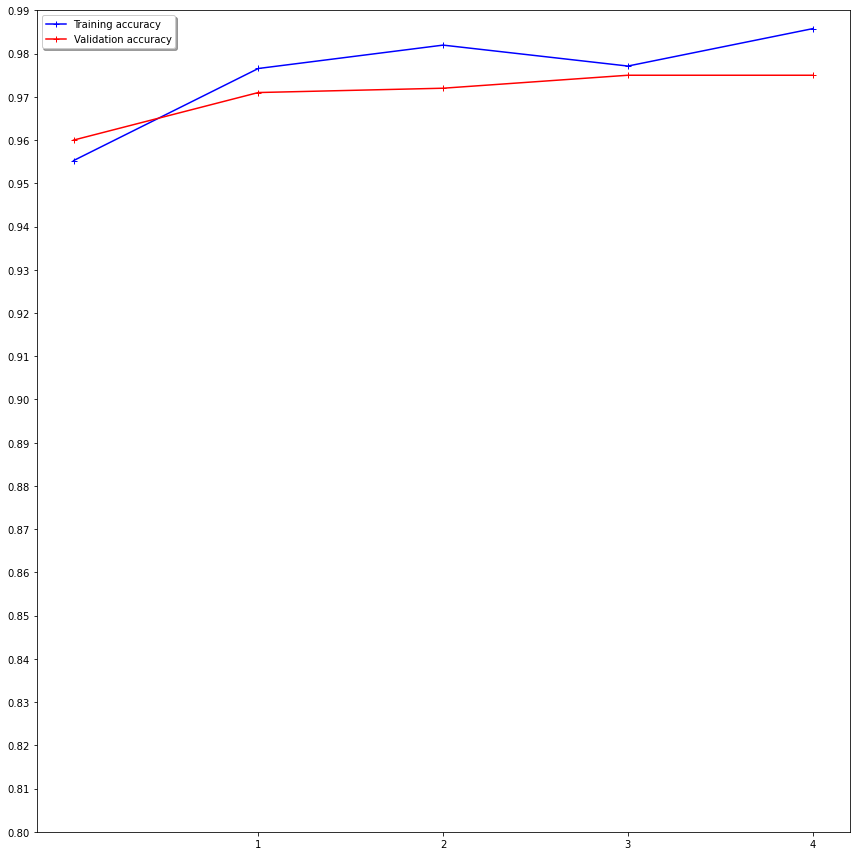

In [65]:
fig, ax2 = plt.subplots(1, 1, figsize=(12, 12))
ax2.plot(history_mymodel.history['accuracy'], 'b+-', label="Training accuracy")
ax2.plot(acc1, 'r+-', label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))
ax2.set_yticks(np.arange(0.8, 1.0, 0.01))
legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()